In [1]:
# Reading data using pandas
# Pandas Python library for data exploration, manipulation, and anslysis

In [5]:
# convertional way to import pandas
import pandas as pd

In [6]:
# read csv file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the last 5 rows
data.tail()

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

In [9]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

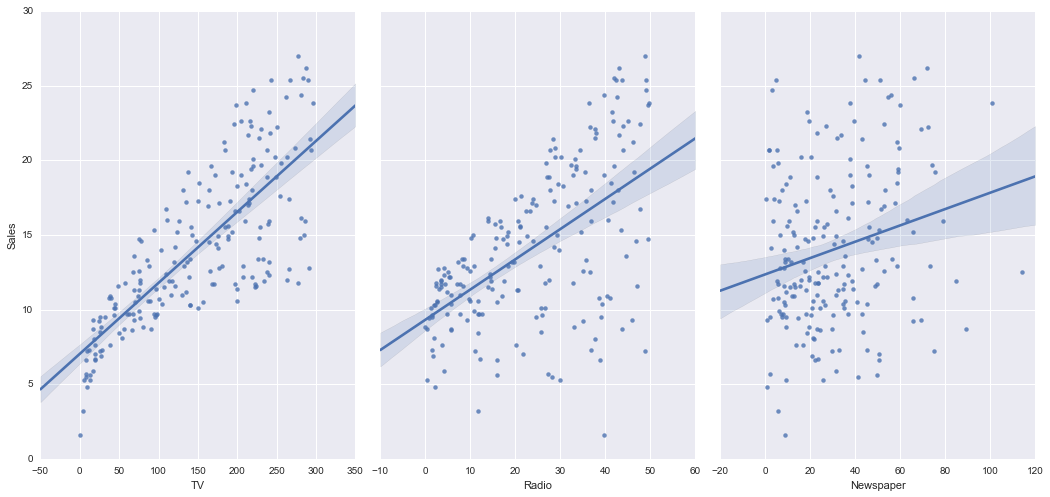

In [10]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [12]:
# create a Python list of feature names
feature_cols = ['TV','Radio','Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [13]:
#check the type and shape of X
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [14]:
# select a series form the dataframe
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [15]:
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(200,)


In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
# default split is 75% for training and 25% for testing
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(150, 3)
(150,)
(50, 3)
(50,)


In [29]:
# Linear regression in scikit-learn
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print linreg.intercept_ # 截距
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [20]:
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111803779)]

In [21]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [22]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 20]

In [23]:
# Mean Absolute Error(MAE)
from sklearn import metrics
print metrics.mean_absolute_error(true, pred)

7.5


In [24]:
# Mean Squared Error(MSE)
print metrics.mean_squared_error(true, pred)

125.0


In [25]:
# Root MEan Squared Error(RMSE)
import numpy as np
print np.sqrt(metrics.mean_squared_error(true, pred))

11.1803398875


In [26]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


In [36]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994
